# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html,"html.parser")

In [7]:
# Extract all rows of data
table = soup.find('table',class_='table')
rows = table.find_all('tr')



    





### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [27]:
# Create an empty list
final_data = []
# empty list for row data 

#dict to hold all of the row data
row_data = {}
#list to hold headers
headers = []

#loops through html element assigning headers
for element in rows[0]:
    text = element.text
    if text != "\n":
        headers.append(text)








#loops through each row, finds all the data
for row in rows[1:]:
    datarow = row.find_all('td')
    row_data = {}
    extracted_row = []
#loops through entire length of row, extracts all the data into a list 
    for i in range(len(datarow)):
        
        extracted_row.append(datarow[i].text)

    print(extracted_row[3])

   #assigns all the row variables with proper headers to dict object 
    row_data = {
    headers[1]: extracted_row[1],
    headers[2]: extracted_row[2],
    headers[3]: extracted_row[3],
    headers[4]: extracted_row[4],
    headers[5]: extracted_row[5],
    headers[6]: extracted_row[6]
    }

    
                   
    final_data.append(row_data)

print(final_data)


    

                   
    
   
        






    

155
156
156
157
157
158
158
159
161
162
162
163
163
164
164
165
166
166
167
168
168
169
169
170
171
171
172
172
173
173
174
175
175
176
176
177
177
178
179
179
180
180
181
181
182
183
183
184
184
185
186
186
187
187
188
189
189
190
190
191
192
192
193
193
194
195
195
196
196
197
198
198
199
199
200
201
201
202
202
203
204
204
205
206
206
207
207
208
209
209
210
211
211
212
212
213
214
214
215
216
216
217
217
218
219
219
220
221
221
222
223
223
224
224
225
226
226
227
228
228
229
230
230
231
232
232
233
233
234
235
235
236
237
237
238
239
239
240
241
241
242
243
243
244
245
245
246
246
247
248
248
249
250
250
251
252
252
253
254
254
255
256
256
257
258
258
259
260
260
261
261
262
263
263
264
265
265
266
269
270
271
271
287
287
288
288
289
290
290
291
292
292
293
293
294
295
295
296
297
297
298
298
299
300
300
301
301
302
303
303
304
304
305
306
306
307
308
308
309
309
310
314
315
315
316
316
317
318
318
319
319
320
321
321
322
322
323
323
324
325
325
326
326
327
327
328
329
329
330
330


In [30]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
dataframe = pd.DataFrame.from_dict(final_data)

print(dataframe)


     terrestrial_date   sol   ls month min_temp pressure
0          2012-08-16    10  155     6    -75.0    739.0
1          2012-08-17    11  156     6    -76.0    740.0
2          2012-08-18    12  156     6    -76.0    741.0
3          2012-08-19    13  157     6    -74.0    732.0
4          2012-08-20    14  157     6    -74.0    740.0
...               ...   ...  ...   ...      ...      ...
1862       2018-02-23  1973  133     5    -78.0    730.0
1863       2018-02-24  1974  134     5    -77.0    729.0
1864       2018-02-25  1975  134     5    -76.0    729.0
1865       2018-02-26  1976  135     5    -77.0    728.0
1866       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 6 columns]


In [31]:
# Confirm DataFrame was created successfully
dataframe.head()

,terrestrial_date,sol,ls,month,min_temp,pressure
0,2012-08-16,10,155,6,-75.0,739.0
1,2012-08-17,11,156,6,-76.0,740.0
2,2012-08-18,12,156,6,-76.0,741.0
3,2012-08-19,13,157,6,-74.0,732.0
4,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [33]:
# Examine data type of each column
dataframe.dtypes

terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [34]:
# Change data types for data analysis
dataframe['terrestrial_date'] = dataframe['terrestrial_date'].astype('string')
dataframe['sol'] = dataframe['sol'].astype('int32')
dataframe['ls'] = dataframe['ls'].astype('int64')
dataframe['month'] = dataframe['month'].astype('int64')
dataframe['min_temp'] = dataframe['min_temp'].astype('float64')
dataframe['pressure'] = dataframe['pressure'].astype('float64')

In [35]:
# Confirm type changes were successful by examining data types again
dataframe.dtypes

terrestrial_date     string
sol                   int32
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [37]:
# 1. How many months are there on Mars?
months = dataframe[['terrestrial_date','month']].groupby(by=['month']).count()
print(months)

       terrestrial_date
month                  
1                   174
2                   178
3                   192
4                   194
5                   149
6                   147
7                   142
8                   141
9                   134
10                  112
11                  138
12                  166


In [38]:
# 2. How many Martian days' worth of data are there?
martian_days = dataframe['terrestrial_date'].count()
print(martian_days)

1867


In [41]:
# 3. What is the average low temperature by month?
average_temp = dataframe[['month','min_temp']].groupby(by='month').mean()
average_temp = average_temp.reset_index()
print(average_temp)

    month   min_temp
0       1 -77.160920
1       2 -79.932584
2       3 -83.307292
3       4 -82.747423
4       5 -79.308725
5       6 -75.299320
6       7 -72.281690
7       8 -68.382979
8       9 -69.171642
9      10 -71.982143
10     11 -71.985507
11     12 -74.451807


<Axes: title={'center': 'Martian Temperature By Month'}, xlabel='month'>

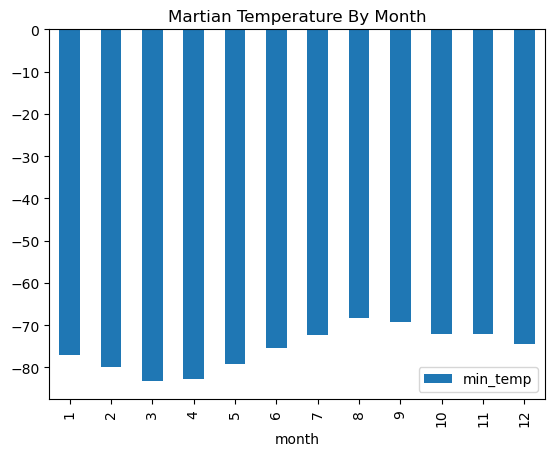

In [44]:
# Plot the average temperature by month
average_temp.plot.bar(x='month',y='min_temp',title='Martian Temperature By Month')

<Axes: title={'center': 'Martin Temperature By Month'}, xlabel='month'>

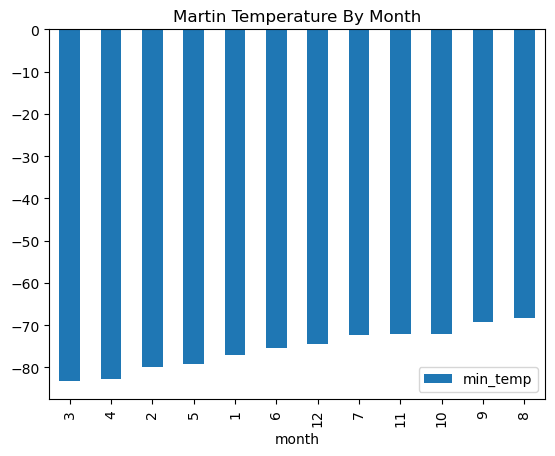

In [45]:
# Identify the coldest and hottest months in Curiosity's location
average_temp = average_temp.sort_values(by='min_temp')
average_temp.plot.bar(x='month',y='min_temp',title='Martin Temperature By Month')

In [51]:
# 4. Average pressure by Martian month
pressure_by_month = dataframe[['month','pressure']].groupby(by='month').mean()
pressure_by_month = pressure_by_month.reset_index()


<Axes: title={'center': 'Martin Pressure By Month'}, xlabel='month'>

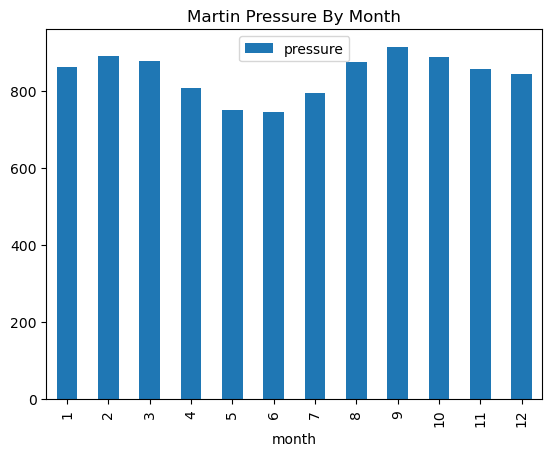

In [53]:
# Plot the average pressure by month
pressure_by_month.plot.bar(x='month',y='pressure',title='Martin Pressure By Month')


1867


<Axes: >

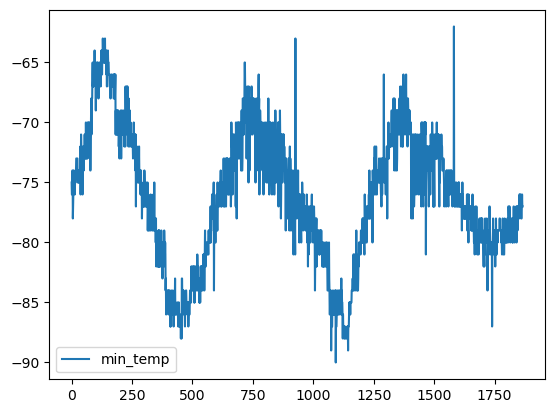

In [59]:
# 5. How many terrestrial (earth) days are there in a Martian year?
count_of_days = dataframe['terrestrial_date'].count()

print(count_of_days)

dataframe.plot.line(use_index=True,y='min_temp')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [60]:
# Write the data to a CSV
dataframe.to_csv('martian_days_data.csv')

In [61]:
browser.quit()